In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

Let's first look at the number of words spoken by male and female characters in calderon's comedias

In [36]:


comedias_df = pd.read_csv('/archetype-predict-pkg/all_characters.csv')
# character_df = pd.read_csv(character_file, usecols = ['id','genre','archetype','character_id', 'scenes', 'utterances', 'tokens', 'words_spoken'])

# #only examine comedias files, not autos, loas, or zarzuelas
# comedias_df = character_df[(character_df['genre'] != 'auto sacramental') & 
#                           (character_df['genre'] != 'loa') & 
#                           (character_df['genre'] != 'zarzuela') & 
#                           (character_df['genre'] != 'mojiganga')]

# #drop nan values

# comedias_df = comedias_df.dropna()
# comedias_df = comedias_df[comedias_df['words_spoken'] > 30]
print(comedias_df.shape)
# print(comedias_df['genre'].value_counts())
comedias_df.groupby('genre')['id'].nunique()

(589, 12)


genre
auto sacramental             22
comedia                       7
comedia burlesca              1
comedia de capa y espada     32
comedia famosa                6
comedia histórica            11
comedia mitológica           14
comedia novelesca             6
comedia palatina              8
comedia religiosa             9
drama                         2
drama de honor                3
drama religioso               1
tragedia                      3
tragedia de capa y espada     1
zarzuela                      1
Name: id, dtype: int64

In [37]:
#kroll and comedias df are identicle except the 'genre' column. Merge 'genre' from kroll into comedias_df
kroll = pd.read_csv('/archetype-predict-pkg/all_characters_kroll.csv')



# Merge 'genre' from kroll into comedias_df based on 'id' and 'character_id'
merged_df = comedias_df.merge(kroll[['id', 'character_id', 'genre']], 
                              on=['id', 'character_id'], 
                              how='left', 
                              suffixes=('', '_kroll'))

# Replace 'genre' in comedias_df with 'genre' from kroll when it's not NaN
merged_df['genre'] = np.where(merged_df['genre_kroll'].notna(), 
                              merged_df['genre_kroll'], 
                              merged_df['genre'])

# Drop the temporary column if not needed
merged_df.drop(columns=['genre_kroll'], inplace=True)


In [38]:
merged_df.groupby('genre')['id'].nunique()




genre
auto sacramental                    23
comedia cómica                      40
comedia histórica                   12
comedia mitológica                  18
comedia novelesca y caballeresca     7
comedia religiosa                   15
sin datos                            1
tragedia y drama de honor            9
zarzuela                             2
Name: id, dtype: int64

comedia                       7
comedia de capa y espada     32
comedia famosa                6
comedia histórica            11
comedia mitológica           14
comedia novelesca             6
comedia palatina              8
comedia religiosa             9

In [5]:
print(comedias_df['id'].unique().shape)

(127,)


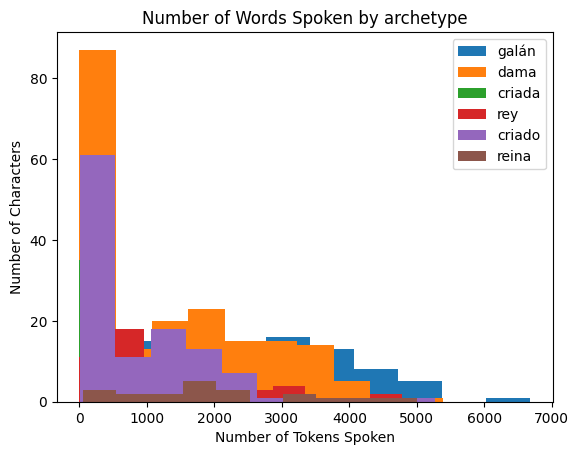

In [6]:
for i in comedias_df['archetype'].unique():
    filtered_data = comedias_df[comedias_df['archetype'] == i]
    plt.hist(filtered_data['words_spoken'], label=i)
    plt.title('Number of Words Spoken by archetype')
    plt.xlabel('Number of Tokens Spoken')
    plt.ylabel('Number of Characters')
    plt.legend()
plt.show()

In [7]:
#find each unique combinations of archetype and genre
#display output in another window
print(comedias_df.groupby(['archetype','genre'])['id'].nunique())

archetype  genre                   
criada     comedia                      5
           comedia burlesca             1
           comedia de capa y espada    29
           comedia famosa               4
           comedia histórica            4
                                       ..
rey        comedia religiosa            6
           drama                        2
           drama de honor               3
           drama religioso              1
           tragedia                     1
Name: id, Length: 74, dtype: int64


Print the total number of words spoken by men and by women

In [8]:
#exclude autos sacramentales, loas, zarzuelas, and mojigangas
comedias_df = comedias_df[(comedias_df['genre'] != 'auto sacramental')]
comedias_df['genre'].value_counts()

genre
comedia de capa y espada     215
comedia mitológica            70
comedia histórica             49
comedia                       42
comedia novelesca             36
comedia religiosa             35
comedia palatina              35
comedia famosa                27
tragedia                      11
drama de honor                 9
drama                          9
comedia burlesca               6
tragedia de capa y espada      4
zarzuela                       3
drama religioso                3
Name: count, dtype: int64

In [9]:
comedias_df['archetype'].value_counts()

archetype
dama      180
criado    113
galán     104
criada     91
rey        49
reina      17
Name: count, dtype: int64

In [10]:
#how many characters in the corpus speak more than 30 words
print(comedias_df[comedias_df['words_spoken'] > 50].shape)

#count number of rows in the dataframe with male or female and > 30 words spoken
print(comedias_df[comedias_df['words_spoken'] > 50]['archetype'].value_counts())


(492, 12)
archetype
dama      149
galán     104
criado     96
criada     78
rey        48
reina      17
Name: count, dtype: int64


Let's get the max, min, and mean of the number of words spoken by gender

In [11]:
for i in comedias_df['archetype'].unique():
    filtered_data = comedias_df[comedias_df['archetype'] == i]
    print(i)
    print(filtered_data['words_spoken'].mean())
    print(filtered_data['words_spoken'].median())
    print(filtered_data['words_spoken'].std())
    print(filtered_data['words_spoken'].min())
    print(filtered_data['words_spoken'].max())

galán
2490.048076923077
2299.0
1405.4201277661589
165
6683
dama
1358.0722222222223
1160.5
1280.9148835456979
0
5385
criada
423.04395604395603
254.0
446.07490432506995
0
1975
rey
1576.3673469387754
1336.0
1104.3730441197083
0
4782
criado
827.6902654867257
380.0
909.3410298480476
2
5275
reina
2160.0
1711.0
1311.3387243576694
291
4997


Now using the predictions of the neural network, we can examine how well the model performed


In [12]:
df = pd.read_csv('/archetype-predict-pkg/results/jan23.csv')

In [13]:
#count rows where label != prediction and prediction == 1
print(df[(df['label'] != df['predictions']) & (df['predictions'] == 1)].shape)

#make a 6 by 6 matrix of the number of times each archetype was predicted to be each archetype
print(pd.crosstab(df['label'], df['predictions']))


(10, 14)
predictions  0   1  2  3  4
label                      
0            2   3  1  3  2
1            1  13  0  2  0
2            1   2  5  0  0
3            0   3  0  3  0
4            0   2  0  0  8
5            0   0  0  2  0


In [14]:
def stats(correct, incorrect):
    precision = correct / (correct + incorrect)
    recall = correct / (correct + incorrect)
    f1 = 2 * (precision * recall) / (precision + recall)

In [2]:
def performance(df): 
    total_correct = 0
    total_incorrect = 0
    for archetype in df['archetype'].unique():
        total = 0
        correct = 0
        incorrect = 0
        
        print(archetype)
        for _,row in df[df['archetype'] == archetype].iterrows():
            total += 1
            if row['label'] == row['predictions']:
                correct += 1
            else:
                incorrect += 1

        total_correct += correct
        total_incorrect += incorrect
        print('Total:', total)  
        print('Correct:', correct)
        print('Incorrect:', incorrect)
    print('Total Correct:', total_correct)
    print('Total Incorrect:', total_incorrect)

    #F1
    accuracy = total_correct / (total_correct + total_incorrect)
    # recall = total_correct / (total_correct + total_incorrect)
    # f1 = 2 * (precision * recall) / (precision + recall)
    print('Accuracy:', accuracy)


 
#of incorrect predictions, how many were belonged to each archetype


performance(df)

NameError: name 'df' is not defined

In [15]:
#for every combination on the matrix print the row in the df
for i in range(6):
    for j in range(6):
        print(df[(df['label'] == i) & (df['predictions'] == j)])    
    

                                 play_title                     genre  \
34                  Los empeños de un acaso  comedia de capa y espada   
46  Casa con dos puertas mala es de guardar  comedia de capa y espada   
67                     Peor está que estaba  comedia de capa y espada   
74                Antes que todo es mi dama  comedia de capa y espada   
88                        El galán fantasma  comedia de capa y espada   
95             Las manos blancas no ofenden  comedia de capa y espada   

   character_id       character_name character_gender archetype  words_spoken  \
34        diego            Don Diego             MALE     galán          2025   
46    don-félix            Don Félix             MALE     galán          4199   
67         juan             Don Juan             MALE     galán          2161   
74    don-félix  Don Félix de Toledo             MALE     galán          4069   
88       carlos               Carlos             MALE     galán          2550   
95

In [16]:
#rewrite jan6.csv to include only the columns we need
jan6 = pd.read_csv('/archetype-predict-pkg/results/jan6.csv')
jan6 = jan6[['label','predictions','play_title','genre','character_id','character_name','archetype','character_gender','words_spoken','id','probabilities']]
jan6.to_csv('/archetype-predict-pkg/results/jan21.csv', index=False)